# Classification

# I. Introduction

#### Objective
Learn and build 4 classification models:
1. Pocket algorithm
2. Quadratic Discriminant Analysis
3. Linear Discriminant Analysis
4. Logistic Regression

#### Approach
1. Performed exploratory data visualization
2. Utilized numpy matrix manipulation techniques in Python to implement the aforementioned algorithms.
3. Studied performance of various classification techniques and visualized results for this data.

# II. Data

This is a classification dataset for determining whether the Loan Status of individuals, which is either Fully Paid or Charged Off. It has been taken from Kaggle datasets (https://www.kaggle.com/zaurbegiev/my-dataset) and although the documentation of where is was taken from is scarce, the readability of the features is good.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve

In [2]:
data_classification = pd.read_csv('credit_train.csv', index_col=False)

In [3]:
data_classification.head(2)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0


In [4]:
data_classification.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


There are some null values, removing them should be okay because there are still enough observations....

In [5]:
data_classification.dropna(how="any", inplace=True)

In [6]:
print('T: ', 'Loan Status')
print('Rows: ', len(data_classification))
print('Columns: ', len(data_classification.columns))

T:  Loan Status
Rows:  36423
Columns:  19


Introducing new columns for numeric values of non-numeric data, based on findings from Assign 0.

In [7]:
data_classification['Fully Paid'] = (data_classification['Loan Status'] == 'Fully Paid')
data_classification['Short Term'] = (data_classification['Term'] == 'Short Term')

In [8]:
for col in ['Fully Paid', 'Short Term']:
    data_classification = data_classification.astype({col:'int32'}, copy=False)

Removing string columns that have been converted...

In [9]:
data_classification.drop(columns=['Loan Status', 'Term'], inplace=True)

Renaming columns for better use in code...

In [10]:
for col in data_classification.columns:
    x = col.split()
    y = ''
    for i in x:
        y += i.lower()+'_'
    y = y[:-1]
    data_classification.rename(columns={col:y}, inplace=True)

In [11]:
data_classification.head(2)

,loan_id,customer_id,current_loan_amount,credit_score,annual_income,years_in_current_job,home_ownership,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens,fully_paid,short_term
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,99999999.0,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0,1,1
6,273581de-85d8-4332-81a5-19b04ce68666,90a75dde-34d5-419c-90dc-1e58b04b3e35,217646.0,730.0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0,1,1


In [12]:
data_classification.corr()['fully_paid'].sort_values()

credit_score                   -0.467169
number_of_open_accounts        -0.025361
monthly_debt                   -0.016347
tax_liens                      -0.012883
number_of_credit_problems      -0.005907
bankruptcies                    0.003085
maximum_open_credit             0.006955
current_credit_balance          0.008538
months_since_last_delinquent    0.016191
years_of_credit_history         0.030938
annual_income                   0.059817
short_term                      0.105298
current_loan_amount             0.200122
fully_paid                      1.000000
Name: fully_paid, dtype: float64

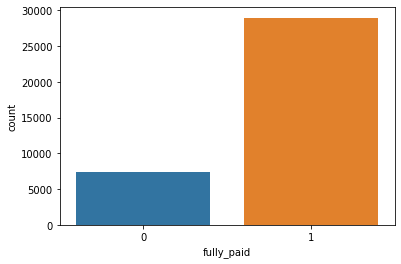

In [13]:
sns.countplot(data_classification['fully_paid']);

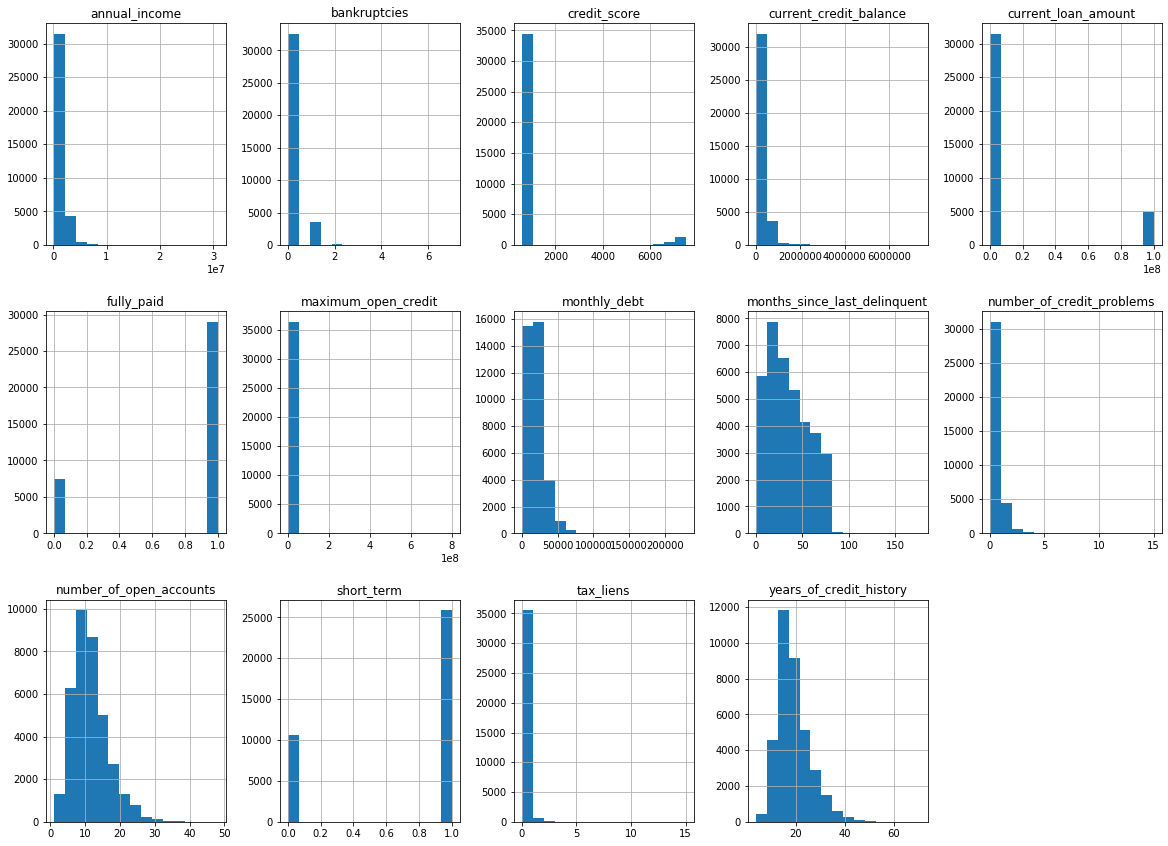

In [14]:
data_classification.select_dtypes(include='number').hist(bins=15, figsize=(20, 20), layout=(4, 5));

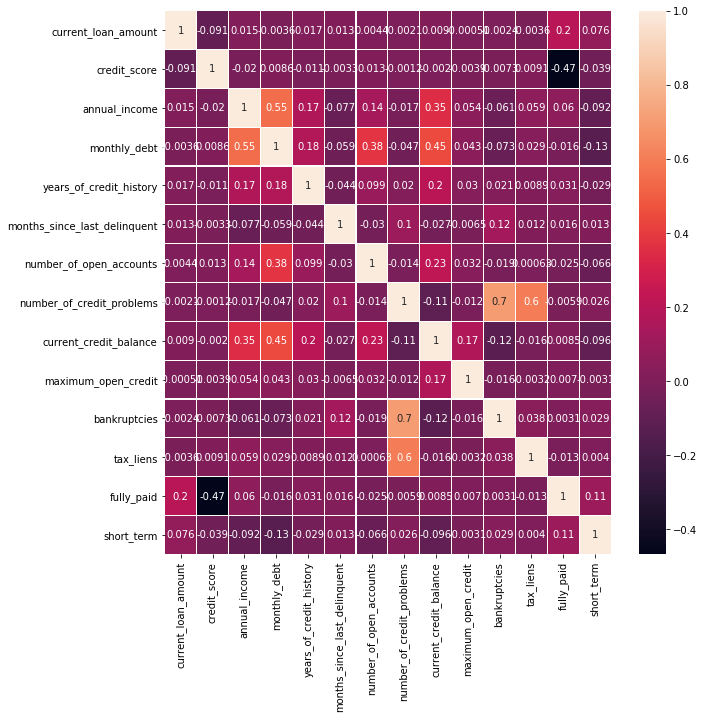

In [15]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data_classification.corr(), annot=True, linewidths=.1, ax=ax)
plt.show()

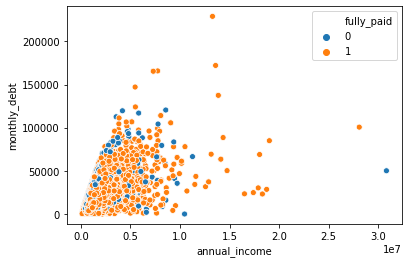

In [16]:
sns.scatterplot(x="annual_income", y="monthly_debt", hue="fully_paid", data=data_classification);

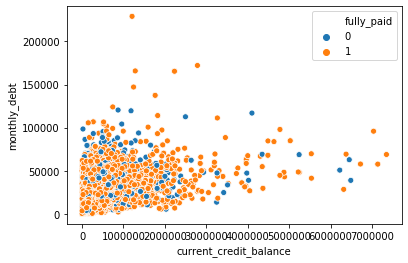

In [17]:
sns.scatterplot(x="current_credit_balance", y="monthly_debt", hue="fully_paid", data=data_classification);

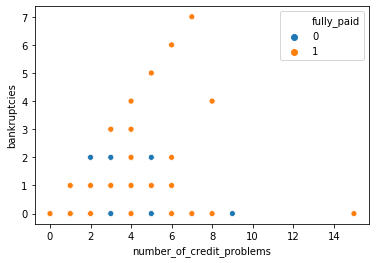

In [18]:
sns.scatterplot(x="number_of_credit_problems", y="bankruptcies", hue="fully_paid", data=data_classification);

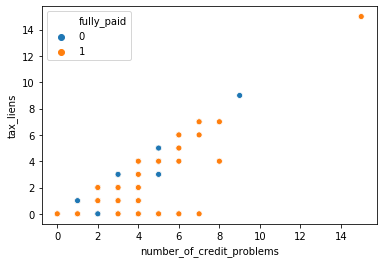

In [19]:
sns.scatterplot(x="number_of_credit_problems", y="tax_liens", hue="fully_paid", data=data_classification);

### Preliminary observations for classification data:
1. The credit score for most of the participants is high. However this seems to have no effect on the ability of paying off the loan. Interpreting this might be an issue, since we actually have more data for fully paid loans.
2. The months since the person was last delinquent does not seem to have an effect on the loan payment.
3. A higher annual income even with a higher monthly debt shows a trend towards better fully paid loans.

# III. Method

### Summary of classification algorithms

#### Pocket algorithm
The Pocket algorithm is a variant of the perceptron algorithm. The perceptron algorithm is a classifier that applies a step function to classify the input data. It goes through al data points, updating weights to fit the training data. However, when the data is not clearly separable, or even otherwise when the iterations are limited, the perceptron algorithm is ont guaranteed to converge, and may not return the most optimal weights. The pocket algorithm improves upon this by saving the best weights learned so far in a "pocket". The weights are updated as follows, and the best learned weights so far are saved:
\begin{equation*}
w(k+1) = w(k) + \alpha*T_i*X_i
\end{equation*}

#### Discriminant analysis: QDA and LDA
Discriminant Analysis uses the Bayes theorem to classify inputs. The likelihood function is modeled as a Gaussian distribution for its properties of being a smooth function for derivative analysis and the central limit theorem. Given k classes for classification, and plugging in the Guassian function, we obtain the following equation for the probability of a class:
\begin{equation*}
P(T = k \mid x) = \frac{ \Big( (2\pi)^{\frac{d}{2}} \vert \boldsymbol\Sigma_k \vert^{\frac{1}{2}} \Big)^{-1} e^{ -\frac{1}{2} (x - \boldsymbol\mu_k)^\top \boldsymbol\Sigma_k^{-1} (x - \boldsymbol\mu_k)} P(T = k)} { P(x) }.
\end{equation*}

When we have a binary classification problem, the posterior probability for the positively labelled samples is higher than the one for the negatively labelled samples. This inequality is opposite in the case of negatively labelled samples. After using this property, the discriminant function is of the form:
\begin{equation*}
\delta_k(\boldsymbol x) = -\frac{1}{2} \ln \vert \boldsymbol\Sigma_k \vert - \frac{1}{2} (\boldsymbol x - \boldsymbol\mu_k)^\top \boldsymbol\Sigma_k^{-1} (\boldsymbol x - \boldsymbol\mu_k) + \ln P(T = k)
\end{equation*}

For a new sample $\tilde x$, we can predict the label using:
\begin{equation*}
y = \arg\max_k \delta_k(\tilde{x}). 
\end{equation*}

QDA maintains the covariance matrix for each class, which is computationally expensive. Also since it is quadratic in nature, if the data is undersampled, this could lead to overfitting of the class boundary. 

The LDA model overcomes these shortcomings by using the same covariance of all classes. The discriminant function thus becomes:
\begin{equation*}
\delta_k(\boldsymbol x) = \boldsymbol x^\top \boldsymbol\Sigma^{-1} \boldsymbol\mu_k -\frac{1}{2} \boldsymbol\mu_k^\top \boldsymbol\Sigma^{-1}\boldsymbol\mu_k + \ln P(T = k).
\end{equation*}

For a new sample $\tilde x$, we can predict the label using:
\begin{equation*}
y = \arg\max_k \delta_k(\tilde{x}). 
\end{equation*}

#### Logistic Regression
When dealing with multiple classes, the least squares method to fit regression for classification might fail due to imbalanced datasets causing one class estimation to be masked by other predictions. Logistic regression predicts $P(T = k  |  \boldsymbol x)$ instead of predicting the class label $k$. The weights matrix $\boldsymbol w$ in this case is a matrix of dimensions $(D+1)*K$ instead of being a vector. Combining all computations, the final weight matrix update function is of the form:
\begin{equation*}
\boldsymbol w = \boldsymbol w + \alpha \boldsymbol X^\top(\boldsymbol T - g(\boldsymbol X))
\end{equation*}

The explanation for the code for each algorithm is given below the implementation for each algorithm.

### A. Super Class Definition

In [20]:
import numpy as np
from copy import deepcopy as deepcopy
from abc import ABC, abstractmethod

class BaseModel(ABC):
    @abstractmethod
    def train(self, X, T):
        pass
    @abstractmethod
    def use(self, X):
        pass

class Classifier(BaseModel):
    """
        Abstract class for classification 
        
        Attributes
        ==========
        meanX       ndarray
                    mean of inputs (from standardization)
        stdX        ndarray
                    standard deviation of inputs (standardization)
    """
    
    def __init__(self, ):
        self.meanX = None
        self.stdX = None

    def normalize(self, X):
        """ standardize the input X """
        
        if not isinstance(X, np.ndarray):
            X = np.asanyarray(X)

        self.meanX = np.mean(X, 0)
        self.stdX = np.std(X, 0)

        Xs = (X - self.meanX)/self.stdX
        return Xs

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    ############## abstract functions ##################
    ####################################################
    @abstractmethod
    def train(self, X, T):
        pass
    
    @abstractmethod
    def use(self, X):
        pass 

### Explanation of BaseClass and Classifier class
The BaseClass is the super class which defines the abstract methods `train` and `use`, which need to be defined for every other class that inherits the BaseClass.

The Classifier class is a template class for defining the classification algorithms we will study in this notebook. It inherits the `train` and `use` methods from the BaseClass as abstract methods that need to be defined for each algorithm. It also provides helper functions for use in the inheriting classes:
1. `normalize`: normalizes the data fed to the algorithm using the mean and standard variance
2. `_check_matrix`: basically a method used by the `add_ones` method to check the size of the matrix (is it 2D?) before adding a column to the data.
3. `add_ones`: a method used to add the bias column to the data.

### B. Pocket Algorithm


In [21]:
class Pocket(Classifier):
    def __init__(self, alpha):
        self.alpha = alpha
        self.w = None
        self.w_pocket = None
        self.MAX_ITERATIONS = 5
    
    @staticmethod
    def compare(X, T, w, w_pocket):
        Y = np.reshape(np.sign(X @ w), (X.shape[0], 1))
        Y_pocket = np.reshape(np.sign(X @ w_pocket), (X.shape[0], 1))
        if np.sum(Y == T) >= np.sum(Y_pocket == T):
            return 1
        else:
            return -1
    
    def train(self, X, T):
        N = X.shape[0]
        self.w = np.zeros(X.shape[1]+1)
        self.w_pocket = np.zeros(X.shape[1]+1)
        X1 = self.add_ones(X)
        for i in range(self.MAX_ITERATIONS):
            converged = True
            for j in np.random.permutation(N):
                y = self.w @ X1[j]
                if np.sign(y) != np.sign(T[j]):
                    self.w += self.alpha*T[j]*X1[j]
                    converged = False
                    # for pocket algorithm
                    if self.compare(X1, T, self.w, self.w_pocket) > 0:
                        self.w_pocket = deepcopy(self.w)
            if converged:
                print("Converged at: ", i)
                break
        print("End of training: ", i)
        
    def use(self, X):
        X1 = self.add_ones(X)
        return np.sign(X1 @ self.w_pocket)

#### Pocket: Explanation
The Pocket classifier class is initialized with hyperparameters for the pocket algorithm. The `compare` method in the class checks whether the current learned weights is better than the weights saved in the pocket as the best known weights. The `train` and `use` methods define the behavior of the abstract methods inherited from the Classifier class.

### C. QDA

In [22]:
class Quadratic_Discriminant_Analysis(Classifier):
    def __init__(self):
        self.mu1 = self.sigma1 = self.prior1 = self.mu2 = self.sigma2 = self.prior2 = self.d1 = self.d2 = None
    
    @staticmethod
    def QDA(X, mu, sigma, prior):
        sigma_inv = np.linalg.inv(sigma)
        diffv = X - mu
        return -0.5*np.log(np.absolute(np.linalg.det(sigma))) - 0.5*np.sum(np.multiply(diffv @ sigma_inv, diffv), axis=1) + np.log(prior)
    
    def train(self, X, T):
        X_normalized = self.normalize(X)
        df = pd.DataFrame(X_normalized)
        df['fully_paid'] = T
        X1 = df[df.fully_paid == -1.0]
        X1 = X1.drop(columns = {'fully_paid'})
        X2 = df[df.fully_paid == 1.0]
        X2 = X2.drop(columns = {'fully_paid'})
        
        self.mu1 = np.mean(X1, 0)
        self.mu2 = np.mean(X2, 0)
        self.sigma1 = np.cov(X1.T)
        self.sigma2 = np.cov(X2.T)
        N1 = X1.shape[0]
        N2 = X2.shape[0]
        self.prior1 = N1/(N1 + N2)
        self.prior2 = N2/(N1 + N2)
        
    def use(self, X):
        X_test = self.normalize(X)
        self.d1 = self.QDA(X_test, np.matrix(self.mu1), self.sigma1, self.prior1)
        self.d2 = self.QDA(X_test, np.matrix(self.mu2), self.sigma2, self.prior2)
        self.d1 = np.array(self.d1).flatten()
        self.d2 = np.array(self.d2).flatten()
        df = pd.DataFrame({'d1': self.d1, 'd2': self.d2})
        pred = np.where(df['d1'] > df['d2'], -1, 1)
        return pred, self.d1, self.d2

#### QDA: Explanation
The Quadratic_Discriminant_Analysis class initializes variables that would be used for discriminant analysis. The `QDA` method calculates the discriminant for each class. The `train` method divides the training data into positive and negative classes data, and then calculates the Gaussian properties for the classes. The `use` method takes the test data, normalizes it and uses the `QDA` method to calculate the discriminant values.

### D. LDA

In [23]:
class Linear_Discriminant_Analysis(Classifier):
    def __init__(self):
        self.mu1 = self.prior1 = self.mu2 = self.prior2 = self.sigma = self.d1 = self.d2 = None
    
    @staticmethod
    def LDA(X, mu, sigma, prior):
        sigma_inv = np.linalg.inv(sigma)
        a = np.multiply(np.dot(X, sigma_inv), mu)
        b = 0.5*np.multiply(np.dot(mu, sigma_inv), mu)
#         result = 
        return np.sum(a - b + np.log(prior), axis=1)
    
    def train(self, X, T):
        X_normalized = self.normalize(X)
        df = pd.DataFrame(X_normalized)
        df['fully_paid'] = T
        X1 = df[df.fully_paid == -1.0]
        X1 = X1.drop(['fully_paid'],axis=1)
        X2 = df[df.fully_paid == 1.0]
        X2 = X2.drop(['fully_paid'],axis=1)
        
        self.mu1 = np.mean(X1, 0)
        self.mu2 = np.mean(X2, 0)
        self.sigma = np.cov(X_normalized.T)
        N1 = X1.shape[0]
        N2 = X2.shape[0]
        self.prior1 = N1/(N1 + N2)
        self.prior2 = N2/(N1 + N2)
    
    def use(self, X):
        X_test = self.normalize(X)
        self.d1 = self.LDA(X_test, np.matrix(self.mu1), self.sigma, self.prior1)
        self.d2 = self.LDA(X_test, np.matrix(self.mu2), self.sigma, self.prior2)
        self.d1 = np.array(self.d1).flatten()
        self.d2 = np.array(self.d2).flatten()
        df = pd.DataFrame({'d1': self.d1, 'd2': self.d2})
        pred = np.where(df['d1'] > df['d2'],-1,1)
        return pred, self.d1, self.d2

#### LDA: Explanation
The Linear_Discriminant_Analysis class initializes variables that would be used for linear discriminant analysis. The `LDA` method calculates the discriminant. The `train` method divides the training data into positive and negative classes data, and then calculates the Gaussian properties for the classes with a shared covariance matrix. The `use` method takes the test data, normalizes it and uses the `LDA` method to calculate the discriminant values.

### E. Logistic Regression

In [24]:
class Logistic(Classifier):
    def __init__(self, alpha):
        self.alpha = alpha
        self.w = None
        self.MAX_ITERATIONS = 5
    
    def softmax(self, Z):
        Z = np.asarray(Z)
        F = np.exp(Z)
        return F / (np.sum(F, axis=1, keepdims = True) if len(Z.shape) == 2 else np.sum(F))
    
    def g(self, X, w):
        return self.softmax(X @ self.w)
    
    def train(self, X, T):
        X_normalized = self.normalize(X)
        N = X_normalized.shape[0]
        D = X_normalized.shape[1]
        K = len(np.unique(T))
        
        self.w = np.zeros((D + 1, K))
        X1 = self.add_ones(X_normalized)
        T = self.add_ones(T.reshape(-1, 1))
        for i in range(self.MAX_ITERATIONS):
            Y = self.g(X1, self.w)
            self.w += self.alpha*X1.T @ (T - Y)
    
    def use(self, X):
        X_normalized = self.normalize(X)
        X1 = self.add_ones(X_normalized)
        return self.g(X1, self.w)

#### Logistic Regression: Explanation
The Logistic class initializes hyperparameters for performing logistic regression. The `softmax` method normalizes the vector given to it so that it can be interpreted like a probability distribution. The `train` function takes in the training data and calculates D (number of features), and K (number of unique classes); generates the weight matrix of dimensions $(D+1, K)$; and updates the weights matrix to best fit the training data. The `use` function normalizes the testing data, adds a bias to it and calculates the outputs using the `g` function.

# Discussions

## Evaluation Metrics
The evaluation metrics used for classification problems are mainly the following:
1. Accuracy - ratio of correctly predicted data to all the data
\begin{equation*}
Accuracy = \frac{TP + TN}{TP + FP + FN + TN}
\end{equation*}
2. Precision - ratio of correctly labelled positive predicted data to all positive predicted data
\begin{equation*}
Precision = \frac{TP}{TP + FP}
\end{equation*}
3. Recall - ratio of correctly labelled positive predicted data to all positive data in the dataset
\begin{equation*}
Recall = \frac{TP}{TP + FN}
\end{equation*}
4. F1 score - harmonic mean of precision and recall, a measure that reflects if one measure is improved at the expense of the other
\begin{equation*}
F1 score = \frac{2*Precision*Recall}{Precision + Recall}
\end{equation*}
5. Specificity - ratio of negatively predicted data to all negative data in the dataset
\begin{equation*}
Specificity = \frac{TN}{TN + FP}
\end{equation*}
6. Confusion matrix - a table showing the data labels and predicted labels and predictions for each cell
    - TP: true positive
    - FP: false positive
    - FN: false negative
    - TN: true negative

prediction/label | +  | -
-----------------|----|----
               + | TP | FP
               - | FN | TN

7. Classification report - shows some of the above metrics for each class
8. Area Under the Curve (AUC) for Receiver Operating Characteristic (ROC) curve - provides an aggregate measure of performance across all possible classification thresholds.

## Train and Test Accuracies
Training accuracy reflects how well the algorithm is at predicting training data labels once it has been trained using the same data. This shows how well the algorithm was able to model the data it has already seen.

Testing accuracy reflects how well the algorithm is at predicting testing data labels once it has been trained using the training data. This shows how well the algorithm will perform on data it has not seen before.

A high training accuracy and a high testing accuracy could mean that the algorithm was able to model the pattern for data recognition well.

A high training accuracy and a low testing accuracy could mean that the algorithm is overfitting the training data and is unable to perform well on unseen data.

A low training accuracy could mean that the algorithm is underfitting the training data and is unable to model the data well.

# IV. Experiments

## Preparing data

In [25]:
positive_samples = data_classification[data_classification.fully_paid == 1]
negative_samples = data_classification[data_classification.fully_paid == 0]
data = positive_samples.sample(n = 5000, random_state = 1)
data = pd.concat([data, negative_samples.sample(n = 5000, random_state = 1)])
data = data.sample(frac=1)

## Applying different classification algorithms to classify data
### Pocket algorithm

#### Splitting data into training and testing sets

In [26]:
X = data[['annual_income', 'monthly_debt', 'current_credit_balance', 'credit_score',\
          'current_loan_amount', 'short_term', 'number_of_open_accounts',\
          'monthly_debt']].copy()
T = data[['fully_paid']].copy()
T['fully_paid'].replace([0, 1], [-1.0, 1.0], inplace=True)

X_train = np.array(X.iloc[:8000,:])
X_test = np.array(X.iloc[8000:,:])

T_train = np.array(T.iloc[:8000,:])
T_test = np.array(T.iloc[8000:,:])

#### Training algorithm

In [27]:
pocket = Pocket(alpha=0.0001)
X_train = pocket.normalize(X_train)
X_test = pocket.normalize(X_test)

In [28]:
pocket.train(X_train, T_train)
Y_train_pocket = pocket.use(X_train)
Y_test_pocket = pocket.use(X_test)

End of training:  4


#### Evaluation of pocket algorithm

In [29]:
print('Training accuracy:', accuracy_score(Y_train_pocket, T_train))
print('Training precision: ', precision_score(Y_train_pocket, T_train))
print('Training recall: ', recall_score(Y_train_pocket, T_train))
print('Training F1 score: ', f1_score(Y_train_pocket, T_train))
tn, fp, fn, tp = confusion_matrix(Y_train_pocket, T_train).ravel()
print('Training specificity: ', tn/(tn+fp))
print()
print('Classification report:\n', classification_report(Y_train_pocket, T_train))
print('Training ROC AUC score: ', roc_auc_score(Y_train_pocket, T_train))

Training accuracy: 0.67075
Training precision:  0.752174993785732
Training recall:  0.6489384516405747
Training F1 score:  0.6967533962698595
Training specificity:  0.7012286484866647

Classification report:
               precision    recall  f1-score   support

        -1.0       0.59      0.70      0.64      3337
         1.0       0.75      0.65      0.70      4663

    accuracy                           0.67      8000
   macro avg       0.67      0.68      0.67      8000
weighted avg       0.68      0.67      0.67      8000

Training ROC AUC score:  0.6750835500636198


In [30]:
print('Testing accuracy:', accuracy_score(Y_test_pocket, T_test))
print('Testing precision: ', precision_score(Y_test_pocket, T_test))
print('Testing recall: ', recall_score(Y_test_pocket, T_test))
print('Testing F1 score: ', f1_score(Y_test_pocket, T_test))
tn, fp, fn, tp = confusion_matrix(Y_test_pocket, T_test).ravel()
print('Testing specificity: ', tn/(tn+fp))
print()
print('Classification report:\n', classification_report(Y_test_pocket, T_test))
print('Testing ROC AUC score: ', roc_auc_score(Y_test_pocket, T_test))

Testing accuracy: 0.671
Testing precision:  0.706243602865916
Testing recall:  0.6503298774740811
Testing F1 score:  0.6771344455348381
Testing specificity:  0.6943556975505857

Classification report:
               precision    recall  f1-score   support

        -1.0       0.64      0.69      0.66       939
         1.0       0.71      0.65      0.68      1061

    accuracy                           0.67      2000
   macro avg       0.67      0.67      0.67      2000
weighted avg       0.67      0.67      0.67      2000

Testing ROC AUC score:  0.6723427875123335


#### Plots for pocket algorithm

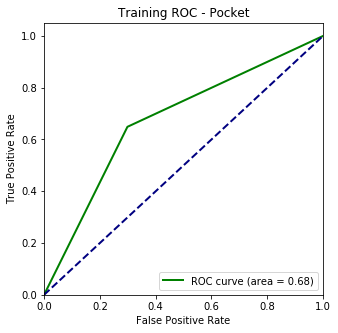

In [31]:
fpr, tpr, _ = roc_curve(Y_train_pocket, T_train)
plt.figure(figsize=(5,5))
lw = 2
plt.plot(fpr, tpr, color='g',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_score(Y_train_pocket, T_train))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Training ROC - Pocket')
plt.legend(loc="lower right")
plt.show()

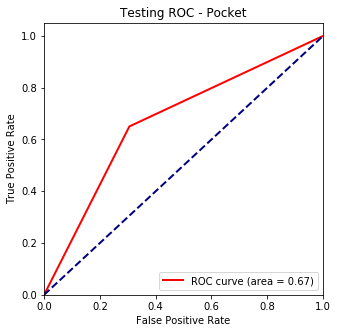

In [32]:
fpr, tpr, _ = roc_curve(Y_test_pocket, T_test)
plt.figure(figsize=(5,5))
lw = 2
plt.plot(fpr, tpr, color='r',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_score(Y_test_pocket, T_test))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Testing ROC - Pocket')
plt.legend(loc="lower right")
plt.show()

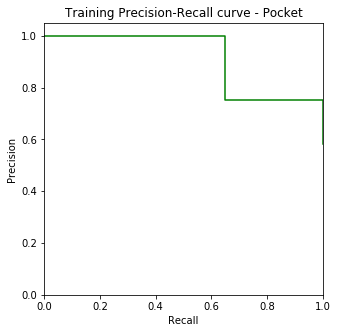

In [33]:
precision, recall, _ = precision_recall_curve(Y_train_pocket, T_train)
plt.figure(figsize=(5,5))
plt.step(recall, precision, color='g')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Training Precision-Recall curve - Pocket')
plt.show()

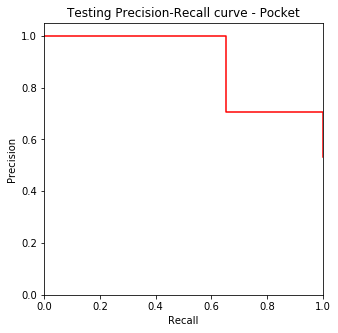

In [34]:
precision, recall, _ = precision_recall_curve(Y_test_pocket, T_test)
plt.figure(figsize=(5,5))
plt.step(recall, precision, color='r')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Testing Precision-Recall curve - Pocket')
plt.show()

#### Discussion of classification results
The Pocket algorithm shows alright classification scores. Here it seems to be a bit more biased towards classifying the positive class.

The training and testing accuracies are similar, so it is safe to assume that it is not overfitting or underfitting too much.

### QDA algorithm

#### Splitting data into training and testing sets

In [35]:
X = data[['annual_income', 'monthly_debt', 'current_credit_balance', 'credit_score',\
          'current_loan_amount', 'short_term', 'number_of_open_accounts',\
          'monthly_debt']].copy()
T = data[['fully_paid']].copy()
T['fully_paid'].replace([0, 1], [-1.0, 1.0], inplace=True)

X_train = np.array(X.iloc[:8000,:])
X_test = np.array(X.iloc[8000:,:])

T_train = np.array(T.iloc[:8000,:])
T_test = np.array(T.iloc[8000:,:])

#### Training algorithm

In [36]:
qda = Quadratic_Discriminant_Analysis()
X_train = qda.normalize(X_train)
X_test = qda.normalize(X_test)

In [37]:
qda.train(X_train, T_train)
Y_train_qda, d1_train_qda, d2_train_qda = qda.use(X_train)
Y_test_qda, di_test_qda, d2_test_qda = qda.use(X_test)

#### Evaluation of QDA algorithm

In [38]:
print('Training accuracy:', accuracy_score(Y_train_qda, T_train))
print('Training precision: ', precision_score(Y_train_qda, T_train))
print('Training recall: ', recall_score(Y_train_qda, T_train))
print('Training F1 score: ', f1_score(Y_train_qda, T_train))
tn, fp, fn, tp = confusion_matrix(Y_train_qda, T_train).ravel()
print('Training specificity: ', tn/(tn+fp))
print()
print('Classification report:\n', classification_report(Y_train_qda, T_train))
print('Training ROC AUC score: ', roc_auc_score(Y_train_qda, T_train))

Training accuracy: 0.616
Training precision:  0.368133233905046
Training recall:  0.7364495275982098
Training F1 score:  0.49088498508452105
Training specificity:  0.5755551845049257

Classification report:
               precision    recall  f1-score   support

          -1       0.87      0.58      0.69      5989
           1       0.37      0.74      0.49      2011

    accuracy                           0.62      8000
   macro avg       0.62      0.66      0.59      8000
weighted avg       0.74      0.62      0.64      8000

Training ROC AUC score:  0.6560023560515678


In [39]:
print('Testing accuracy:', accuracy_score(Y_test_qda, T_test))
print('Testing precision: ', precision_score(Y_test_qda, T_test))
print('Testing recall: ', recall_score(Y_test_qda, T_test))
print('Testing F1 score: ', f1_score(Y_test_qda, T_test))
tn, fp, fn, tp = confusion_matrix(Y_test_qda, T_test).ravel()
print('Testing specificity: ', tn/(tn+fp))
print()
print('Classification report:\n', classification_report(Y_test_qda, T_test))
print('Testing ROC AUC score: ', roc_auc_score(Y_test_qda, T_test))

Testing accuracy: 0.6205
Testing precision:  0.9856704196519959
Testing recall:  0.5638173302107728
Testing F1 score:  0.71731843575419
Testing specificity:  0.952054794520548

Classification report:
               precision    recall  f1-score   support

          -1       0.27      0.95      0.42       292
           1       0.99      0.56      0.72      1708

    accuracy                           0.62      2000
   macro avg       0.63      0.76      0.57      2000
weighted avg       0.88      0.62      0.67      2000

Testing ROC AUC score:  0.7579360623656604


#### Plots for QDA algorithm

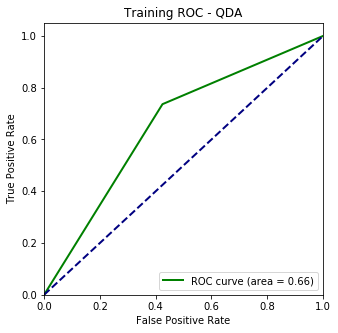

In [40]:
fpr, tpr, _ = roc_curve(Y_train_qda, T_train)
plt.figure(figsize=(5,5))
lw = 2
plt.plot(fpr, tpr, color='g',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_score(Y_train_qda, T_train))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Training ROC - QDA')
plt.legend(loc="lower right")
plt.show()

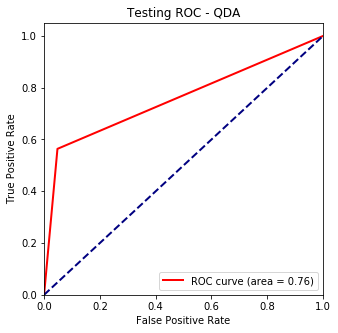

In [41]:
fpr, tpr, _ = roc_curve(Y_test_qda, T_test)
plt.figure(figsize=(5,5))
lw = 2
plt.plot(fpr, tpr, color='r',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_score(Y_test_qda, T_test))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Testing ROC - QDA')
plt.legend(loc="lower right")
plt.show()

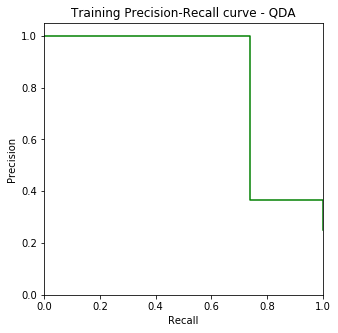

In [42]:
precision, recall, _ = precision_recall_curve(Y_train_qda, T_train)
plt.figure(figsize=(5,5))
plt.step(recall, precision, color='g')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Training Precision-Recall curve - QDA')
plt.show()

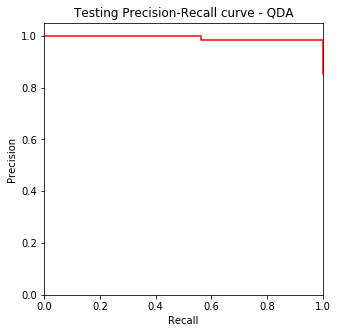

In [43]:
precision, recall, _ = precision_recall_curve(Y_test_qda, T_test)
plt.figure(figsize=(5,5))
plt.step(recall, precision, color='r')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Testing Precision-Recall curve - QDA')
plt.show()

#### Discussion of QDA results
The QDA algorithm also gives alright scores for classification. It seems biased towards the negative class during training but during testing gives better scores for the positive class.

Again the training and testing accuracies are similar, it should be okay to assume that there is no overfitting or underfitting.

### LDA Algorithm
#### Splitting data into training and testing sets

In [44]:
X = data[['annual_income', 'monthly_debt', 'current_credit_balance', 'credit_score',\
          'current_loan_amount', 'short_term', 'number_of_open_accounts',\
          'monthly_debt']].copy()
T = data[['fully_paid']].copy()
T['fully_paid'].replace([0, 1], [-1.0, 1.0], inplace=True)

X_train = np.array(X.iloc[:8000,:])
X_test = np.array(X.iloc[8000:,:])

T_train = np.array(T.iloc[:8000,:])
T_test = np.array(T.iloc[8000:,:])

#### Training algorithm

In [45]:
lda = Linear_Discriminant_Analysis()
X_train = lda.normalize(X_train)
X_test = lda.normalize(X_test)

In [46]:
lda.train(X_train, T_train)
Y_train_lda, _, _ = lda.use(X_train)
Y_test_lda, _, _ = lda.use(X_test)

#### Evaluation of LDA algorithm

In [47]:
print('Training accuracy:', accuracy_score(Y_train_lda, T_train))
print('Training precision: ', precision_score(Y_train_lda, T_train))
print('Training recall: ', recall_score(Y_train_lda, T_train))
print('Training F1 score: ', f1_score(Y_train_lda, T_train))
tn, fp, fn, tp = confusion_matrix(Y_train_lda, T_train).ravel()
print('Training specificity: ', tn/(tn+fp))
print()
print('Classification report:\n', classification_report(Y_train_lda, T_train))
print('Training ROC AUC score: ', roc_auc_score(Y_train_lda, T_train))

Training accuracy: 0.656
Training precision:  0.8438975888640318
Training recall:  0.6151476716796521
Training F1 score:  0.7115908614546217
Training specificity:  0.7468762595727529

Classification report:
               precision    recall  f1-score   support

          -1       0.47      0.75      0.57      2481
           1       0.84      0.62      0.71      5519

    accuracy                           0.66      8000
   macro avg       0.65      0.68      0.64      8000
weighted avg       0.73      0.66      0.67      8000

Training ROC AUC score:  0.6810119656262026


In [48]:
print('Testing accuracy:', accuracy_score(Y_test_lda, T_test))
print('Testing precision: ', precision_score(Y_test_lda, T_test))
print('Testing recall: ', recall_score(Y_test_lda, T_test))
print('Testing F1 score: ', f1_score(Y_test_lda, T_test))
tn, fp, fn, tp = confusion_matrix(Y_test_lda, T_test).ravel()
print('Testing specificity: ', tn/(tn+fp))
print()
print('Classification report:\n', classification_report(Y_test_lda, T_test))
print('Testing ROC AUC score: ', roc_auc_score(Y_test_lda, T_test))

Testing accuracy: 0.6485
Testing precision:  0.8454452405322416
Testing recall:  0.5994194484760522
Testing F1 score:  0.7014861995753715
Testing specificity:  0.7572347266881029

Classification report:
               precision    recall  f1-score   support

          -1       0.46      0.76      0.57       622
           1       0.85      0.60      0.70      1378

    accuracy                           0.65      2000
   macro avg       0.65      0.68      0.64      2000
weighted avg       0.73      0.65      0.66      2000

Testing ROC AUC score:  0.6783270875820776


#### Plots for LDA algorithm

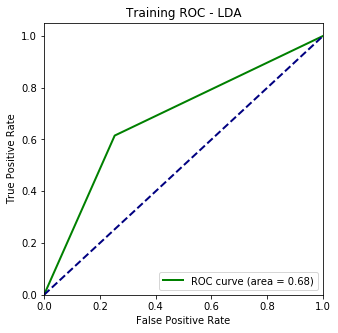

In [49]:
fpr, tpr, _ = roc_curve(Y_train_lda, T_train)
plt.figure(figsize=(5,5))
lw = 2
plt.plot(fpr, tpr, color='g',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_score(Y_train_lda, T_train))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Training ROC - LDA')
plt.legend(loc="lower right")
plt.show()

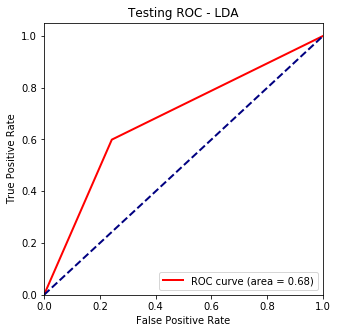

In [50]:
fpr, tpr, _ = roc_curve(Y_test_lda, T_test)
plt.figure(figsize=(5,5))
lw = 2
plt.plot(fpr, tpr, color='r',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_score(Y_test_lda, T_test))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Testing ROC - LDA')
plt.legend(loc="lower right")
plt.show()

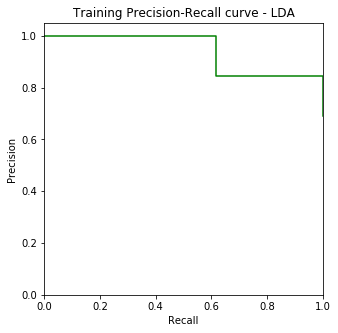

In [51]:
precision, recall, _ = precision_recall_curve(Y_train_lda, T_train)
plt.figure(figsize=(5,5))
plt.step(recall, precision, color='g')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Training Precision-Recall curve - LDA')
plt.show()

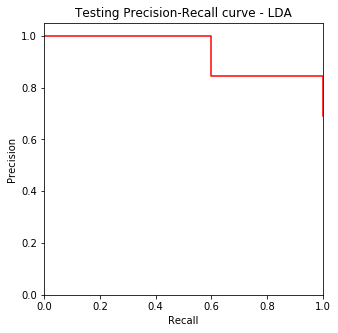

In [52]:
precision, recall, _ = precision_recall_curve(Y_test_lda, T_test)
plt.figure(figsize=(5,5))
plt.step(recall, precision, color='r')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Testing Precision-Recall curve - LDA')
plt.show()

#### Discussion of LDA results
The LDA algorithm gives alright scores for classification. The algorithm seems a little biased towards predicting the positive class.

The training and testing accuracies are similar, it is alright to assume that there is no overfitting or underfitting involved.

### Logistic Regression algorithm
#### Splitting data into training and testing sets

In [53]:
X = data[['annual_income', 'monthly_debt', 'current_credit_balance', 'credit_score',\
          'current_loan_amount', 'short_term', 'number_of_open_accounts',\
          'monthly_debt']].copy()
T = data[['fully_paid']].copy()
X_train = np.array(X.iloc[:8000,:])
X_test = np.array(X.iloc[8000:,:])

T_train = np.array(T.iloc[:8000,:])
T_test = np.array(T.iloc[8000:,:])

#### Training algorithm

In [54]:
lr = Logistic(0.01)
X_train = lr.normalize(X_train)
X_test = lr.normalize(X_test)

In [55]:
lr.train(X_train, T_train)
Y_train_lr = lr.use(X_train[:])
Y_test_lr = lr.use(X_test[:])
Y_train_lr = np.argmax(Y_train_lr, 1)
Y_test_lr = np.argmax(Y_test_lr, 1)

#### Evaluation of Logistic Regression algorithm

In [56]:
print('Training accuracy:', accuracy_score(Y_train_lr, T_train))
print('Training precision: ', precision_score(Y_train_lr, T_train))
print('Training recall: ', recall_score(Y_train_lr, T_train))
print('Training F1 score: ', f1_score(Y_train_lr, T_train))
tn, fp, fn, tp = confusion_matrix(Y_train_lr, T_train).ravel()
print('Training specificity: ', tn/(tn+fp))
print()
print('Classification report:\n', classification_report(Y_train_lr, T_train))
print('Training ROC AUC score: ', roc_auc_score(Y_train_lr, T_train))

Training accuracy: 0.526375
Training precision:  0.1600795426298782
Training recall:  0.6110056925996205
Training F1 score:  0.2536931258617294
Training specificity:  0.5135329686150303

Classification report:
               precision    recall  f1-score   support

           0       0.90      0.51      0.65      6946
           1       0.16      0.61      0.25      1054

    accuracy                           0.53      8000
   macro avg       0.53      0.56      0.45      8000
weighted avg       0.80      0.53      0.60      8000

Training ROC AUC score:  0.5622693306073254


In [58]:
print('Testing accuracy:', accuracy_score(Y_test_lr, T_test))
print('Testing precision: ', precision_score(Y_test_lr, T_test))
print('Testing recall: ', recall_score(Y_test_lr, T_test))
print('Testing F1 score: ', f1_score(Y_test_lr, T_test))
tn, fp, fn, tp = confusion_matrix(Y_test_lr, T_test).ravel()
print('Testing specificity: ', tn/(tn+fp))
print()
print('Classification report:\n', classification_report(Y_test_lr, T_test))
print('Testing ROC AUC score: ', roc_auc_score(Y_test_lr, T_test))

Testing accuracy: 0.5255
Testing precision:  0.15762538382804503
Testing recall:  0.55
Testing F1 score:  0.24502784407319014
Testing specificity:  0.5215116279069767

Classification report:
               precision    recall  f1-score   support

           0       0.88      0.52      0.65      1720
           1       0.16      0.55      0.25       280

    accuracy                           0.53      2000
   macro avg       0.52      0.54      0.45      2000
weighted avg       0.78      0.53      0.60      2000

Testing ROC AUC score:  0.5357558139534884


#### Plots for Logistic Regression algorithm

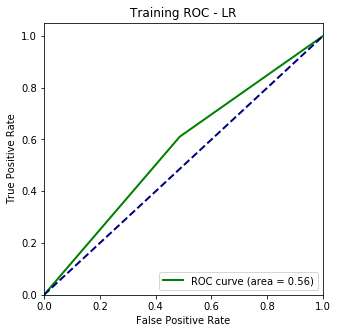

In [59]:
fpr, tpr, _ = roc_curve(Y_train_lr, T_train)
plt.figure(figsize=(5,5))
lw = 2
plt.plot(fpr, tpr, color='g',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_score(Y_train_lr, T_train))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Training ROC - LR')
plt.legend(loc="lower right")
plt.show()

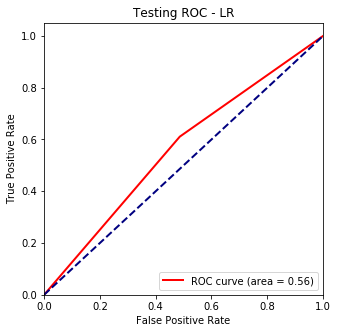

In [60]:
fpr, tpr, _ = roc_curve(Y_train_lr, T_train)
plt.figure(figsize=(5,5))
lw = 2
plt.plot(fpr, tpr, color='r',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_score(Y_train_lr, T_train))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Testing ROC - LR')
plt.legend(loc="lower right")
plt.show()

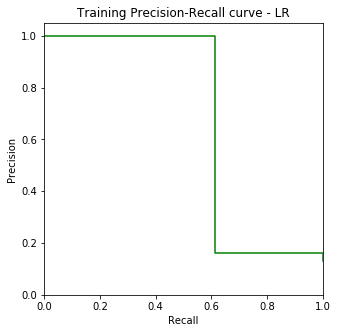

In [61]:
precision, recall, _ = precision_recall_curve(Y_train_lr, T_train)
plt.figure(figsize=(5,5))
plt.step(recall, precision, color='g')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Training Precision-Recall curve - LR')
plt.show()

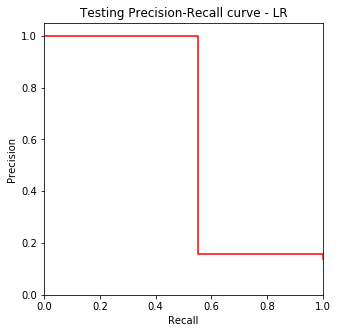

In [62]:
precision, recall, _ = precision_recall_curve(Y_test_lr, T_test)
plt.figure(figsize=(5,5))
plt.step(recall, precision, color='r')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Testing Precision-Recall curve - LR')
plt.show()

#### Discussion of LR results
The Logistic Regression algorithm gives just better than average classification performance. The prediction seems heavily biased towards the negative class.

The training and testing accuracies are again similar and therefore it should be okay to assume that there is no overfitting or underfitting.

# Conclusion
## Visualization methods
1. The ROC curve summarizes the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds.
2. The precision-recall curve summarizes the trade-off between the true positive rate and the positive predictive value for a predictive model using different probability thresholds.

Since we are working with a balanced dataset here (after undersampling the positive class), the ROC curve should be a better comparison method for the algorithm performance.

## Comparison of methods
For this dataset, since during usage it is balanced, the F1 score and the AUC-ROC score should be good metrics for comparing the performance of the algorithms. Looking at both these, the QDA algorithm seems to perform the best.

Looking at the ROC curves for each of the algorithm's predictions, QDA's curves seem to also reflect that it gives the best prediction performance on this dataset.

# References
1. https://scikit-learn.org/stable/modules/model_evaluation.html
2. https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/